## To implement K-means Clustering

* K-Means Clustering is an unsupervised machine learning algorithm 
* K-Means falls under the category of centroid-based clustering.
* In contrast to traditional supervised machine learning algorithms, K-Means attempts to classify data without having first been trained with labeled data.

#### 1. Import the necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### 2. The dataset is imported using the pandas library. It is imported in a dataframe from the data.csv file

The dataset that I have selected contains 24 features (or attributes) and 194 rows (or instances). It is composed of biomedical voice measurements from 31 people, out of which 23 have Parkinson's Disease.
* Each column is a particular voice measure
* Each row corresponds to the voice recordings of these individuals
* The aim here is to segregate healthy people from the people having Parkinson's Disease by means of the unsupervised learning algorithm without using the labels , i.e, without using the 'Status' column and forming clusters based on the remaining features

In [3]:
dataset = pd.read_csv('data.csv')
dataset.shape

(195, 24)

#### 3. Selecting the features for clustering (not using the last column that contains all the labels)

columns = 'name', 'status' are not selected for clustering

In [4]:
x = dataset.iloc[:, 1:23].values

In [5]:
x.shape

(195, 22)

#### 4. Importing Kmeans from sklearn and fitting on the features

In [6]:
from sklearn.cluster import KMeans

#### 5. Using WCSS to choose the right number of clusters

- An ideal way to figure out the right number of clusters would be to calculate the Within-Cluster-Sum-of-Squares (WCSS)
- WCSS is the sum of squares of the distances of each data point in all clusters to their respective centroids

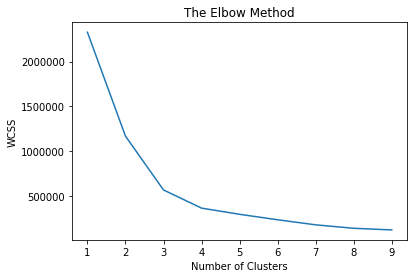

In [7]:
wcss = []
for i in range(1,10):
    #object of k means class
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init =510,random_state = 0)
    #fit to data x
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,10),wcss)
plt.title('The Elbow Method')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

Using the elbow method, we see the at the right number os clusters for this dataset can be 3 or 4.
So we choose 3 clusters and implement K-means algorithm to segregate our features into clusters

- 'n_clusters' : The number of clusters to form as well as the number of centroids to generate. 
- 'k-means++' : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.
- 'n_init' : Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.
- max_iter : Maximum number of iterations of the k-means algorithm for a single run.


#### 6. Using class KMeans and fitting it on the features 

In [8]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10)
y_kmeans = kmeans.fit_predict(x)

In [9]:
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 1, 1, 1, 1, 2, 1])

#### 7. Using Matplotlib to visualize the clusters

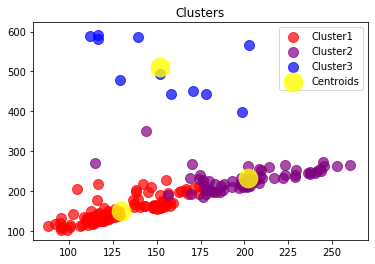

In [10]:
#Visualizing clusters
plt.scatter(x[y_kmeans == 0,0],x[y_kmeans == 0,1], s =100, c = 'red', label='Cluster1',alpha=0.7)
plt.scatter(x[y_kmeans == 1,0],x[y_kmeans == 1,1], s =100, c = 'purple', label='Cluster2',alpha=0.7)
plt.scatter(x[y_kmeans == 2,0],x[y_kmeans == 2,1], s =100, c = 'blue', label='Cluster3',alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=350, c='yellow',label='Centroids',alpha=0.8)
plt.title('Clusters')
plt.legend()
plt.show()


From the above results, it can be seen that we have got our features grouped into three clusters, with their respective centroids.
- Cluster 1 (Red) and Cluster 2 (Purple) are near to each other, so they are healthy people since more features belonged to people who were healthy.
- Cluster 3 (Blue) is away from the rest of the two clusters and hence it probably belongs to people suffering from Parkinson's disease.